# 1D Chain Model

In this notebook, we begin to investigate the Anderson model through the simulation of the d= 1
 case.

In [51]:
# Init a 2D periodic lattice of n^2 atoms:
import numpy as np

n = 3
chain = np.zeros((n, n))

In [44]:
#chain: physical model
# epsilon is the control parameter for randomness
# T controls the hopping

import networkx as nx

def _hamiltonian(chain, epsilon, t):
    H = epsilon * np.identity((len(chain))**2)
    G = nx.grid_graph(dim = (n, n), periodic=True)
    A = nx.adjacency_matrix(G)
    H -= t * (np.roll(np.identity(len(chain)), 1, axis=0) + np.roll(np.identity(len(chain)), -1, axis=0))
    
    return H



The Hamiltonian is given by:

$$\hat{H} = \epsilon_0 \delta_{n, m} - t (\delta_{n+1, m} + \delta_{n-1, m})$$

In [45]:
H = _hamiltonian(chain, 0, 1)

In [46]:
# Found the eigenvalues and eigenvectors of the Hamiltonian (energies, and energy eigenstates)
np.linalg.eigh(H)

EighResult(eigenvalues=array([-2.00000000e+00, -1.99383467e+00, -1.99383467e+00, -1.97537668e+00,
       -1.97537668e+00, -1.94473984e+00, -1.94473984e+00, -1.90211303e+00,
       -1.90211303e+00, -1.84775907e+00, -1.84775907e+00, -1.78201305e+00,
       -1.78201305e+00, -1.70528033e+00, -1.70528033e+00, -1.61803399e+00,
       -1.61803399e+00, -1.52081193e+00, -1.52081193e+00, -1.41421356e+00,
       -1.41421356e+00, -1.29889610e+00, -1.29889610e+00, -1.17557050e+00,
       -1.17557050e+00, -1.04499713e+00, -1.04499713e+00, -9.07980999e-01,
       -9.07980999e-01, -7.65366865e-01, -7.65366865e-01, -6.18033989e-01,
       -6.18033989e-01, -4.66890728e-01, -4.66890728e-01, -3.12868930e-01,
       -3.12868930e-01, -1.56918191e-01, -1.56918191e-01, -4.95560432e-16,
       -2.55140025e-16,  1.56918191e-01,  1.56918191e-01,  3.12868930e-01,
        3.12868930e-01,  4.66890728e-01,  4.66890728e-01,  6.18033989e-01,
        6.18033989e-01,  7.65366865e-01,  7.65366865e-01,  9.07980999e-01,
  

In [47]:
# Assume that the initial state is the ground state.
from scipy.linalg import expm
def __time_evolution(H, t):
    return expm(-1j * H * t)

psi_0 = np.zeros(n)
psi_0[n//2] = 1

In [48]:
end_time = 10
history = []
for step in range(end_time):
    psi_t = __time_evolution(H, step) @ psi_0
    history.append(psi_t)

0.9999999999999998

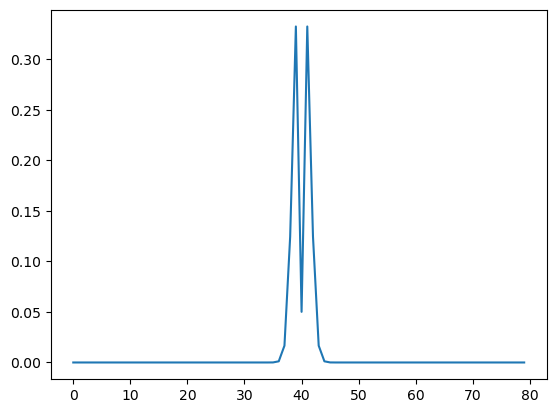

In [49]:
import matplotlib.pyplot as plt

#plt.plot(history[1].T.conj() @ history[1])
density = np.real(np.multiply(history[1].conj(), history[1]))
plt.plot(density)
sum(density)
#for wavefunction in history:
#    plt.plot(np.linalg.norm(wavefunction))

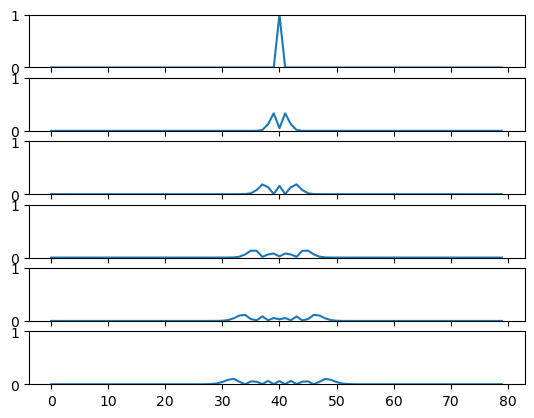

In [50]:
fig, axs = plt.subplots(6)
for i, ax in enumerate(axs):
    density = np.real(np.multiply(history[i].conj(), history[i]))
    ax.plot(density)
    ax.set_ylim(0, 1)
    sum(density)

